In [0]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

from google.colab import files


# Загрузка данных и первоначальный анализ



In [0]:
df=pd.read_csv('/content/drive/My Drive/Курсач/Colab Notebooks/autoRu.csv', sep = ';')

In [149]:
df_for_test = df.copy(deep=True)
df

,Mark_info,Model_info,Year,Price_segment,Transmission,Gear_type,Fuel_rate,Vendor_country,Region,Mileage,Horse_power,Owners_number,Body_type,PTS,Color_hex,Salon,Count_doors,Auto_class,Trunk_volume_min,Price_rub
0,Volkswagen,Polo,2011,ECONOMY,AUTOMATIC,FORWARD_CONTROL,7.0,EUROPEAN,Москва,81000,105.0,3.0,SEDAN,True,0000CC,False,4,B,460.0,279000
1,Lexus,LX,2015,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,14.4,JAPANESE,Екатеринбург,105500,367.0,2.0,ALLROAD_5_DOORS,True,040001,False,5,J,258.0,4570000
2,Kia,Stinger,2018,MEDIUM,AUTOMATIC,ALL_WHEEL_DRIVE,10.6,KOREAN,Воронеж,13800,370.0,1.0,LIFTBACK,True,EE1D19,False,5,D,406.0,2700000
3,Audi,Q7,2020,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,8.0,EUROPEAN,Москва,0,249.0,NaN,ALLROAD_5_DOORS,True,C49648,True,5,J,865.0,4805000
4,Mercedes-Benz,E-Класс,2000,PREMIUM,AUTOMATIC,REAR_DRIVE,10.2,EUROPEAN,Санкт-Петербург,405000,204.0,3.0,SEDAN,True,0000CC,False,4,E,520.0,305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28116,Toyota,Avensis,2011,MEDIUM,MECHANICAL,FORWARD_CONTROL,6.5,JAPANESE,Екатеринбург,186600,147.0,2.0,SEDAN,True,EE1D19,False,4,D,509.0,655000
28117,Hyundai,Matrix,2008,MEDIUM,AUTOMATIC,FORWARD_CONTROL,8.3,KOREAN,Москва,159130,103.0,2.0,COMPACTVAN,True,040001,False,5,M,354.0,360000
28118,Volvo,XC90,2017,PREMIUM,AUTOMATIC,ALL_WHEEL_DRIVE,7.6,EUROPEAN,Краснодар,44600,249.0,1.0,ALLROAD_5_DOORS,True,C49648,False,5,J,310.0,3100000
28119,Nissan,Teana,2010,MEDIUM,VARIATOR,FORWARD_CONTROL,9.5,JAPANESE,Армавир,69000,182.0,2.0,SEDAN,True,040001,False,4,D,476.0,850000


In [150]:
df.describe()

,Year,Fuel_rate,Mileage,Horse_power,Owners_number,Count_doors,Trunk_volume_min,Price_rub
count,28121.000000,26195.000000,28121.000000,27824.000000,23443.000000,28121.000000,27232.000000,2.812100e+04
mean,2012.116888,7.784508,105004.810711,160.985229,2.040822,4.538103,491.905369,1.225165e+06
std,6.203567,1.869813,85461.577060,84.172530,0.856576,0.630243,233.399991,1.860919e+06
min,1958.000000,2.100000,0.000000,33.000000,1.000000,2.000000,110.000000,2.000000e+04
25%,2008.000000,6.600000,35000.000000,106.000000,1.000000,4.000000,400.000000,3.450000e+05
50%,2012.000000,7.400000,100000.000000,141.000000,2.000000,5.000000,476.000000,5.990000e+05
75%,2017.000000,8.500000,151000.000000,184.000000,3.000000,5.000000,530.000000,1.361300e+06
max,2020.000000,19.200000,999999.000000,650.000000,3.000000,5.000000,9300.000000,3.300000e+07


In [0]:
#Заполняем пропуски
df['Fuel_rate'].fillna(7.7, inplace=True)
df['Horse_power'].fillna(160, inplace=True)
df['Owners_number'].fillna(2, inplace=True)
df['PTS'].fillna(False, inplace=True)
df['Trunk_volume_min'].fillna(458, inplace=True)
df['Auto_class'].fillna('J', inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28121 entries, 0 to 28120
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mark_info         28121 non-null  object 
 1   Model_info        28121 non-null  object 
 2   Year              28121 non-null  int64  
 3   Price_segment     28121 non-null  object 
 4   Transmission      28121 non-null  object 
 5   Gear_type         28121 non-null  object 
 6   Fuel_rate         28121 non-null  float64
 7   Vendor_country    28121 non-null  object 
 8   Region            28121 non-null  object 
 9   Mileage           28121 non-null  int64  
 10  Horse_power       28121 non-null  float64
 11  Owners_number     28121 non-null  float64
 12  Body_type         28121 non-null  object 
 13  PTS               28121 non-null  bool   
 14  Color_hex         28121 non-null  object 
 15  Salon             28121 non-null  bool   
 16  Count_doors       28121 non-null  int64 

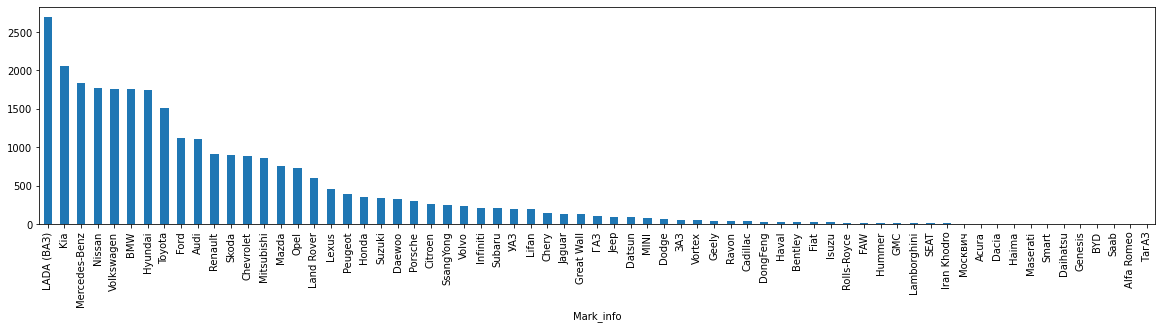

In [144]:
df_var = df.groupby(['Mark_info']).Model_info.count() 
df_var.sort_values(inplace=True, ascending=False)
df_var.plot(kind='bar', figsize = (20,4))

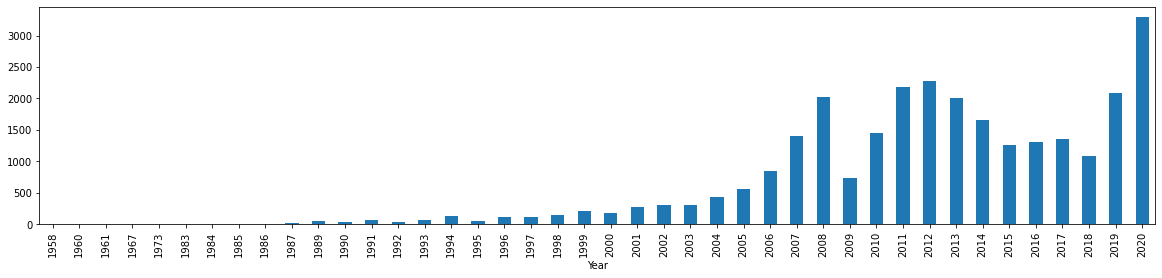

In [152]:
df_var = df.groupby(['Year']).Model_info.count() 
df_var.plot(kind='bar', figsize = (20,4))

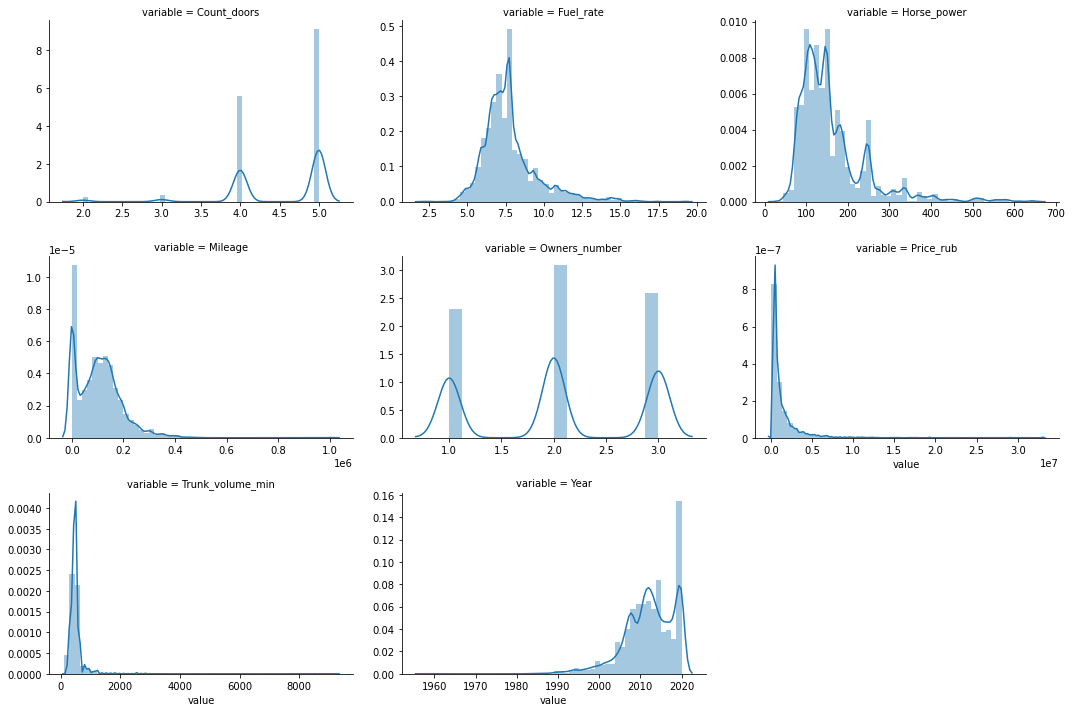

In [153]:
numeric_data = ['Year', 'Fuel_rate', 'Mileage', 'Horse_power', 'Owners_number', 'Count_doors', 'Trunk_volume_min', 'Price_rub']
f=pd.melt(df, value_vars=sorted(numeric_data))
g=sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g=g.map(sns.distplot,'value')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


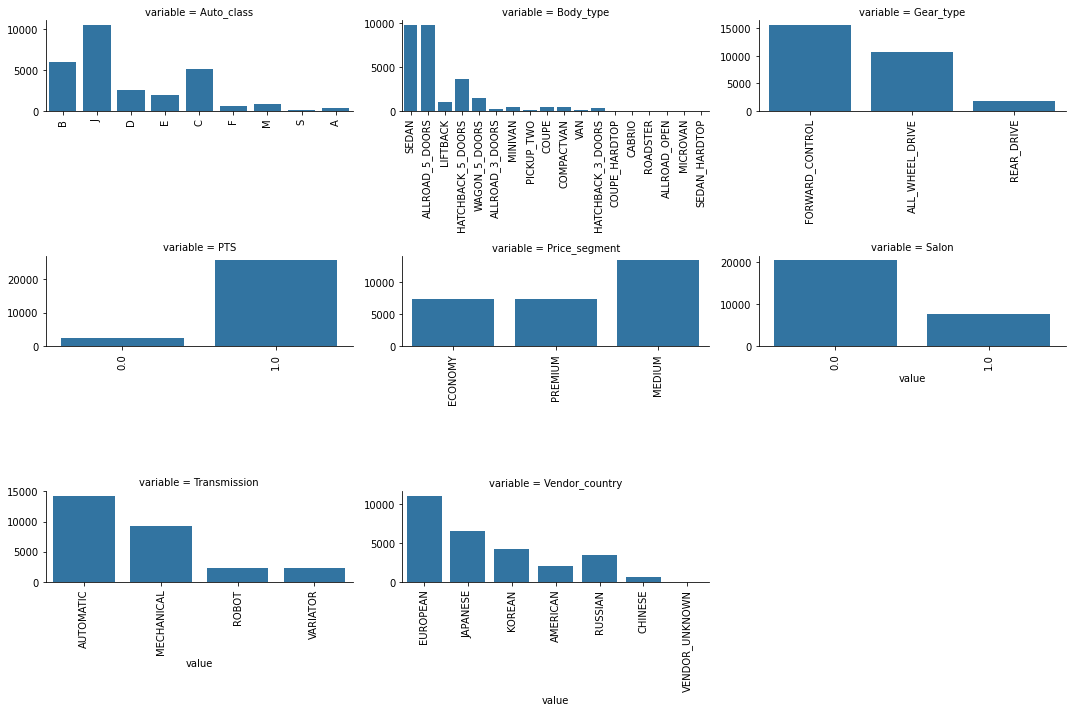

In [136]:
categorical_data = ['Price_segment', 'Transmission', 'Gear_type', 'Vendor_country', 'Body_type', 'PTS', 'Salon', 'Auto_class']
f=pd.melt(df, value_vars=sorted(categorical_data))
g=sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
[plt.setp(ax.get_xticklabels(), rotation = 90) for ax in g.axes.flat]
g.fig.tight_layout()
g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g=g.map(sns.countplot,'value')

# Препроцессинг

In [0]:
#Bool значение к бинарным
df["PTS"] = df["PTS"].astype(float)
df["Salon"] = df["Salon"].astype(float)

In [0]:

#Кодируем категориальные признаки числами

mark_encoder = preprocessing.LabelEncoder() 
mark_encoder.fit(df['Mark_info']) 
df['Mark_info'] = mark_encoder.transform(df['Mark_info']) 

model_encoder = preprocessing.LabelEncoder() 
model_encoder.fit(df['Model_info']) 
df['Model_info'] = model_encoder.transform(df['Model_info']) 

color_encoder = preprocessing.LabelEncoder() 
color_encoder.fit(df['Color_hex']) 
df['Color_hex'] = color_encoder.transform(df['Color_hex']) 

region_encoder = preprocessing.LabelEncoder() 
region_encoder.fit(df['Region']) 
df['Region'] = region_encoder.transform(df['Region'])


body_type_encoder = preprocessing.LabelEncoder() 
body_type_encoder.fit(df['Body_type']) 
df['Body_type'] = body_type_encoder.transform(df['Body_type']) 

auto_class_encoder = preprocessing.LabelEncoder() 
auto_class_encoder.fit(df['Auto_class']) 
df['Auto_class'] = auto_class_encoder.transform(df['Auto_class']) 

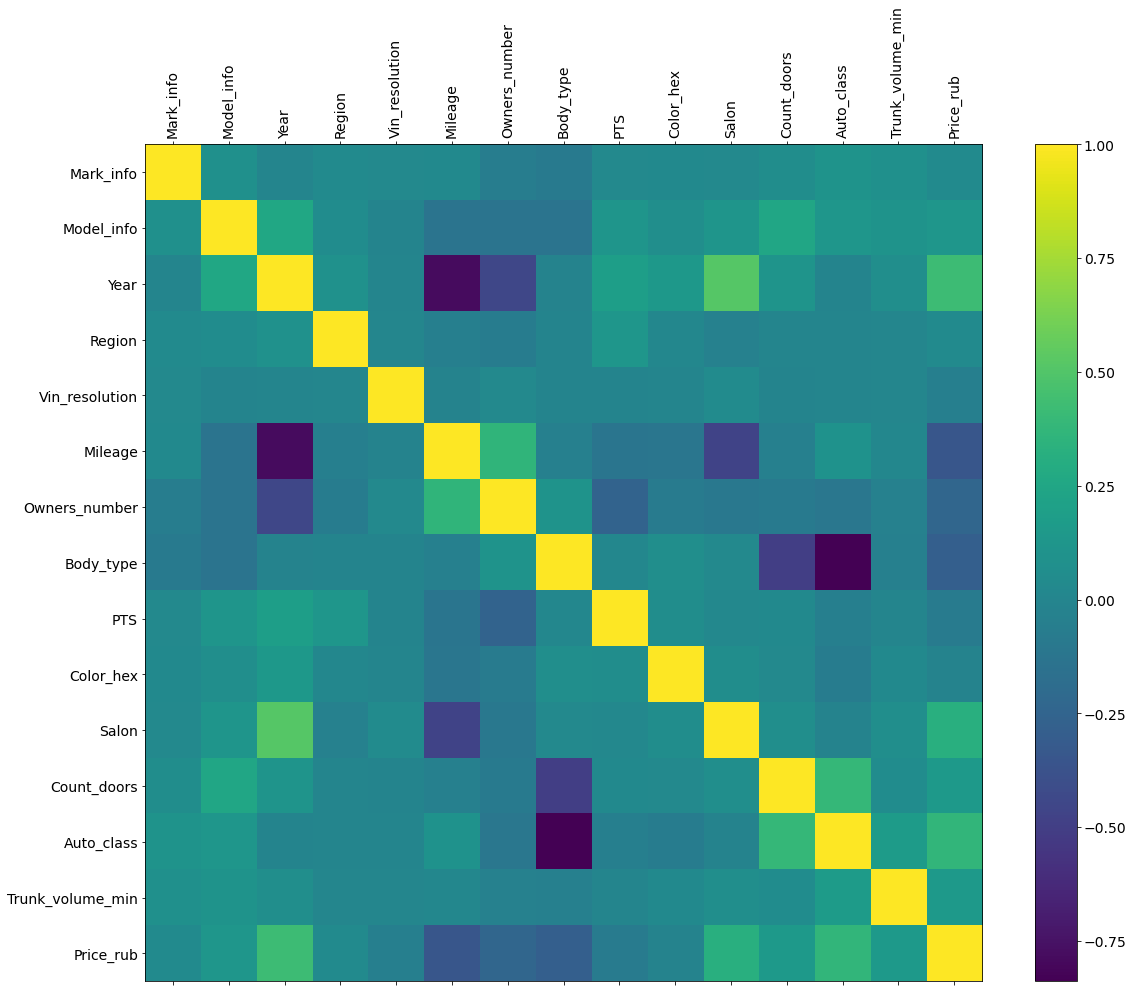

In [7]:
#Матрица корреляции
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [9]:
f = pd.melt(df, value_vars=sorted(numeric_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

NameError: ignored

In [0]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['Body_type','Auto_class'], drop_first=True)

In [0]:
df.describe()

,Mark_info,Model_info,Year,Region,Vin_resolution,Mileage,Owners_number,PTS,Color_hex,Salon,Count_doors,Trunk_volume_min,Price_rub,Body_type_1,Body_type_2,Body_type_3,Body_type_4,Body_type_5,Body_type_6,Body_type_7,Body_type_8,Body_type_9,Body_type_10,Body_type_11,Body_type_12,Auto_class_1,Auto_class_2,Auto_class_3,Auto_class_4,Auto_class_5,Auto_class_6,Auto_class_7,Auto_class_8
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3.700000e+03,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000
mean,30.389189,219.957568,2012.980541,33.010811,0.990000,96167.594324,1.931081,0.925135,6.441622,0.285676,4.637838,470.892703,8.373734e+05,0.404865,0.014054,0.002973,0.000541,0.008378,0.138108,0.038108,0.004595,0.005405,0.295946,0.004324,0.067297,0.296486,0.159189,0.050000,0.024595,0.005946,0.435676,0.019459,0.000541
std,13.386346,110.037601,5.314153,7.487316,0.099512,74827.984195,0.787065,0.263209,4.320944,0.451797,0.548463,212.848128,8.881998e+05,0.490932,0.117730,0.054451,0.023246,0.091162,0.345060,0.191483,0.067637,0.073332,0.456529,0.065626,0.250570,0.456770,0.365902,0.217974,0.154907,0.076891,0.495912,0.138152,0.023246
min,0.000000,0.000000,1962.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,63.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,134.000000,2010.000000,35.000000,1.000000,38632.750000,1.000000,1.000000,2.000000,0.000000,4.000000,379.000000,3.796660e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,226.000000,2013.000000,35.000000,1.000000,94000.000000,2.000000,1.000000,7.000000,0.000000,5.000000,459.000000,6.104000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,310.000000,2017.000000,35.000000,1.000000,140000.000000,3.000000,1.000000,11.000000,1.000000,5.000000,510.000000,9.390000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,59.000000,397.000000,2020.000000,59.000000,1.000000,650000.000000,3.000000,1.000000,15.000000,1.000000,5.000000,2650.000000,1.589000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
#разделение на предикторов и на целевую переменную
X=df.drop(columns=['Price_rub'])
Y=df[['Price_rub']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

In [0]:
#нормализация данных
scaler_X = StandardScaler() 
X_train = scaler_X.fit_transform(X_train)

# scaler_Y = StandardScaler()
# Y_train = scaler_Y.fit_transform(Y_train)

In [0]:
#архитектура нейронной сети
model = keras.Sequential()

model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (32,)))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size = 1, epochs=100)

Epoch 1/100
2960/2960 [==============================] - 3s 1ms/step - loss: 1454731709887.0703 - mae: 837383.9375
Epoch 2/100
2960/2960 [==============================] - 3s 977us/step - loss: 1277134387198.6055 - mae: 759726.8750
Epoch 3/100
2960/2960 [==============================] - 3s 960us/step - loss: 976020161395.8649 - mae: 606607.5000
Epoch 4/100
2960/2960 [==============================] - 3s 913us/step - loss: 742968353240.2920 - mae: 487643.7500
Epoch 5/100
2960/2960 [==============================] - 3s 916us/step - loss: 631886137397.6984 - mae: 447689.5938
Epoch 6/100
2960/2960 [==============================] - 3s 946us/step - loss: 581711996392.2642 - mae: 429371.8438
Epoch 7/100
2960/2960 [==============================] - 3s 932us/step - loss: 551531690197.2594 - mae: 414535.2188
Epoch 8/100
2960/2960 [==============================] - 3s 981us/step - loss: 529564365393.5365 - mae: 406121.7812
Epoch 9/100
2960/2960 [==============================] - 3s 982us/step -

In [0]:
X_test = scaler_X.transform(X_test)

In [0]:
model.evaluate(X_test, Y_test)

740/740 [==============================] - 0s 50us/step


[457456612368.6054, 283767.875]

In [0]:
df_for_test = df_for_test[['Year', 'Mileage', 'Owners_number', 'PTS', 'Salon', 'Auto_class', 'Body_type', 'Price_rub']]
df_for_test

,Year,Mileage,Owners_number,PTS,Salon,Auto_class,Body_type,Price_rub
0,2016,58126,2.0,True,False,J,ALLROAD_5_DOORS,3390000
1,2002,93660,3.0,True,False,J,ALLROAD_3_DOORS,85000
2,2005,90000,2.0,True,False,E,SEDAN,550000
3,2020,0,NaN,True,True,B,SEDAN,1031000
4,2014,81000,1.0,True,True,J,ALLROAD_5_DOORS,1780000
...,...,...,...,...,...,...,...,...
3695,2008,229000,3.0,True,False,J,ALLROAD_5_DOORS,673000
3696,2012,162000,3.0,True,False,B,SEDAN,300000
3697,2012,113000,1.0,True,False,B,SEDAN,430000
3698,2014,97000,2.0,True,False,J,ALLROAD_5_DOORS,950000


In [0]:
#Заполняем пропуски
df_for_test['Owners_number'].fillna(2, inplace=True)
df_for_test['PTS'].fillna(False, inplace=True)
df_for_test['Auto_class'].fillna('J', inplace=True)

In [0]:
df_for_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           3700 non-null   int64  
 1   Mileage        3700 non-null   int64  
 2   Owners_number  3700 non-null   float64
 3   PTS            3700 non-null   bool   
 4   Salon          3700 non-null   bool   
 5   Auto_class     3700 non-null   object 
 6   Body_type      3700 non-null   object 
 7   Price_rub      3700 non-null   int64  
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 180.8+ KB


In [0]:
#Кодируем категориальные признаки числами

body_type_encoder = preprocessing.LabelEncoder() 
body_type_encoder.fit(df_for_test['Body_type']) 
df_for_test['Body_type'] = body_type_encoder.transform(df_for_test['Body_type']) 

auto_class_encoder = preprocessing.LabelEncoder() 
auto_class_encoder.fit(df_for_test['Auto_class']) 
df_for_test['Auto_class'] = auto_class_encoder.transform(df_for_test['Auto_class']) 

In [0]:
#Bool значение к бинарным
df_for_test["PTS"] = df_for_test["PTS"].astype(float)
df_for_test["Salon"] = df_for_test["Salon"].astype(float)

In [0]:
#OneHotEncoding
df_for_test = pd.get_dummies(df_for_test, columns=['Body_type','Auto_class'], drop_first=True)
df_for_test

,Year,Mileage,Owners_number,PTS,Salon,Price_rub,Body_type_1,Body_type_2,Body_type_3,Body_type_4,Body_type_5,Body_type_6,Body_type_7,Body_type_8,Body_type_9,Body_type_10,Body_type_11,Body_type_12,Auto_class_1,Auto_class_2,Auto_class_3,Auto_class_4,Auto_class_5,Auto_class_6,Auto_class_7,Auto_class_8
0,2016,58126,2.0,1.0,0.0,3390000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2002,93660,3.0,1.0,0.0,85000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2005,90000,2.0,1.0,0.0,550000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2020,0,2.0,1.0,1.0,1031000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,2014,81000,1.0,1.0,1.0,1780000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,2008,229000,3.0,1.0,0.0,673000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3696,2012,162000,3.0,1.0,0.0,300000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3697,2012,113000,1.0,1.0,0.0,430000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3698,2014,97000,2.0,1.0,0.0,950000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#разделение на предикторов и на целевую переменную
X=df_for_test.drop(columns=['Price_rub'])
Y=df_for_test[['Price_rub']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

In [0]:
#нормализация данных
scaler_X = StandardScaler() 
X_train = scaler_X.fit_transform(X_train)

In [0]:
#архитектура нейронной сети
model = keras.Sequential()

model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (25,)))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size = 1, epochs=100)

Epoch 1/100
2960/2960 [==============================] - 3s 950us/step - loss: 1461357696654.0972 - mae: 839572.3125
Epoch 2/100
2960/2960 [==============================] - 3s 900us/step - loss: 1333355902677.9314 - mae: 782316.4375
Epoch 3/100
2960/2960 [==============================] - 3s 935us/step - loss: 1067605586922.2452 - mae: 651237.0000
Epoch 4/100
2960/2960 [==============================] - 3s 963us/step - loss: 804744676061.9481 - mae: 507875.7500
Epoch 5/100
2960/2960 [==============================] - 3s 968us/step - loss: 651302296020.8716 - mae: 435051.1562
Epoch 6/100
2960/2960 [==============================] - 3s 935us/step - loss: 585464935972.9370 - mae: 414423.7812
Epoch 7/100
2960/2960 [==============================] - 3s 957us/step - loss: 556595471432.6428 - mae: 403500.5938
Epoch 8/100
2960/2960 [==============================] - 3s 910us/step - loss: 538727593313.6978 - mae: 393297.8125
Epoch 9/100
2960/2960 [==============================] - 3s 921us/ste

# Нейросеть для определённого производителя

In [0]:
df=pd.read_csv('/content/drive/My Drive/Курсач/Colab Notebooks/autoRuBmw.csv', sep = ';')

In [0]:
df

,Mark_info,Model_info,Year,Region,Vin_resolution,Mileage,Owners_number,Body_type,PTS,Color_hex,Salon,Count_doors,Auto_class,Trunk_volume_min,Price_rub
0,BMW,X5,2015,Москва,True,71000,2.0,ALLROAD_5_DOORS,True,040001,False,5,J,650.0,2750000
1,BMW,3 серия,2017,Сочи,True,27425,1.0,SEDAN,True,040001,False,4,D,480.0,1650000
2,BMW,X3,2020,Магнитогорск,NaN,0,NaN,ALLROAD_5_DOORS,True,0000CC,True,5,J,550.0,3980000
3,BMW,3 серия,1994,Москва,True,200000,3.0,COUPE,False,97948F,False,2,D,405.0,328000
4,BMW,5 серия,2006,Москва,True,230000,2.0,SEDAN,True,040001,False,4,E,520.0,480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,BMW,3 серия,2008,Москва,True,148000,3.0,WAGON_5_DOORS,True,040001,False,5,D,460.0,599000
3696,BMW,X5,2019,Химки,NaN,0,NaN,ALLROAD_5_DOORS,True,FAFBFB,True,5,J,645.0,5396000
3697,BMW,5 серия,2020,Москва,True,13,1.0,SEDAN,True,040001,False,4,E,530.0,3462652
3698,BMW,X6,2008,Москва,True,111105,1.0,ALLROAD_5_DOORS,True,040001,False,5,J,724.0,880000


In [0]:
df = df.drop(['Mark_info'], axis = 1)

In [0]:
df

,Model_info,Year,Region,Vin_resolution,Mileage,Owners_number,Body_type,PTS,Color_hex,Salon,Count_doors,Auto_class,Trunk_volume_min,Price_rub
0,X5,2015,Москва,True,71000,2.0,ALLROAD_5_DOORS,True,040001,False,5,J,650.0,2750000
1,3 серия,2017,Сочи,True,27425,1.0,SEDAN,True,040001,False,4,D,480.0,1650000
2,X3,2020,Магнитогорск,NaN,0,NaN,ALLROAD_5_DOORS,True,0000CC,True,5,J,550.0,3980000
3,3 серия,1994,Москва,True,200000,3.0,COUPE,False,97948F,False,2,D,405.0,328000
4,5 серия,2006,Москва,True,230000,2.0,SEDAN,True,040001,False,4,E,520.0,480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,3 серия,2008,Москва,True,148000,3.0,WAGON_5_DOORS,True,040001,False,5,D,460.0,599000
3696,X5,2019,Химки,NaN,0,NaN,ALLROAD_5_DOORS,True,FAFBFB,True,5,J,645.0,5396000
3697,5 серия,2020,Москва,True,13,1.0,SEDAN,True,040001,False,4,E,530.0,3462652
3698,X6,2008,Москва,True,111105,1.0,ALLROAD_5_DOORS,True,040001,False,5,J,724.0,880000


In [0]:
#Заполняем пропуски
df['Vin_resolution'].fillna(True, inplace=True)
df['Owners_number'].fillna(2, inplace=True)
df['PTS'].fillna(False, inplace=True)
df['Trunk_volume_min'].fillna(458, inplace=True)
df['Auto_class'].fillna('J', inplace=True)

In [0]:
#Bool значение к бинарным
df["Vin_resolution"] = df["Vin_resolution"].astype(float)
df["PTS"] = df["PTS"].astype(float)
df["Salon"] = df["Salon"].astype(float)

In [0]:
#Кодируем категориальные признаки числами

model_encoder = preprocessing.LabelEncoder() 
model_encoder.fit(df['Model_info']) 
df['Model_info'] = model_encoder.transform(df['Model_info']) 

color_encoder = preprocessing.LabelEncoder() 
color_encoder.fit(df['Color_hex']) 
df['Color_hex'] = color_encoder.transform(df['Color_hex']) 

region_encoder = preprocessing.LabelEncoder() 
region_encoder.fit(df['Region']) 
df['Region'] = region_encoder.transform(df['Region'])


body_type_encoder = preprocessing.LabelEncoder() 
body_type_encoder.fit(df['Body_type']) 
df['Body_type'] = body_type_encoder.transform(df['Body_type']) 

auto_class_encoder = preprocessing.LabelEncoder() 
auto_class_encoder.fit(df['Auto_class']) 
df['Auto_class'] = auto_class_encoder.transform(df['Auto_class']) 

In [0]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['Model_info','Body_type','Auto_class'], drop_first=True)

In [0]:
df.describe()

,Year,Region,Vin_resolution,Mileage,Owners_number,PTS,Color_hex,Salon,Count_doors,Trunk_volume_min,Price_rub,Model_info_1,Model_info_2,Model_info_3,Model_info_4,Model_info_5,Model_info_6,Model_info_7,Model_info_8,Model_info_9,Model_info_10,Model_info_11,Model_info_12,Model_info_13,Model_info_14,Model_info_15,Model_info_16,Model_info_17,Model_info_18,Model_info_19,Model_info_20,Model_info_21,Model_info_22,Model_info_23,Model_info_24,Model_info_25,Model_info_26,Model_info_27,Model_info_28,Body_type_1,Body_type_2,Body_type_3,Body_type_4,Body_type_5,Body_type_6,Body_type_7,Body_type_8,Body_type_9,Body_type_10,Auto_class_1,Auto_class_2,Auto_class_3,Auto_class_4,Auto_class_5,Auto_class_6,Auto_class_7
count,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3.700000e+03,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.00000,3700.000000,3700.00000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.00000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000,3700.000000
mean,2013.957027,120.046757,0.953514,91004.786216,1.969730,0.905946,5.229730,0.358108,4.445405,514.382703,2.446651e+06,0.008649,0.000811,0.137027,0.014054,0.181622,0.025676,0.079459,0.005405,0.001351,0.001081,0.001622,0.008108,0.001622,0.000541,0.060811,0.006216,0.107568,0.00027,0.031351,0.00027,0.142162,0.005946,0.083243,0.012973,0.042703,0.002162,0.001351,0.002162,0.004595,0.000811,0.041892,0.007297,0.027838,0.024865,0.002973,0.390811,0.00027,0.005135,0.044595,0.153784,0.217027,0.079459,0.493514,0.000811,0.009459
std,5.701130,43.762504,0.210565,88248.671661,0.796826,0.291943,4.448277,0.479509,0.748428,89.941833,2.071855e+06,0.092608,0.028467,0.343922,0.117730,0.385584,0.158187,0.270491,0.073332,0.036741,0.032866,0.040242,0.089691,0.040242,0.023246,0.239015,0.078608,0.309875,0.01644,0.174289,0.01644,0.349264,0.076891,0.276287,0.113173,0.202213,0.046455,0.036741,0.046455,0.067637,0.028467,0.200369,0.085123,0.164530,0.155734,0.054451,0.487998,0.01644,0.071485,0.206440,0.360790,0.412277,0.270491,0.500025,0.028467,0.096812
min,1979.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,88.000000,7.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,106.000000,1.000000,6863.250000,1.000000,1.000000,2.000000,0.000000,4.000000,465.000000,9.300000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,106.000000,1.000000,77608.500000,2.000000,1.000000,2.000000,0.000000,5.000000,520.000000,1.706000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,164.000000,1.000

In [0]:
#разделение на предикторов и на целевую переменную
X=df.drop(columns=['Price_rub'])
Y=df[['Price_rub']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

In [0]:
#нормализация данных
scaler_X = StandardScaler() 
X_train = scaler_X.fit_transform(X_train)

# scaler_Y = StandardScaler()
# Y_train = scaler_Y.fit_transform(Y_train)

In [0]:
#архитектура нейронной сети
model = keras.Sequential()

model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (55,)))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [0]:
hist = model.fit(X_train, Y_train, batch_size = 1, epochs=100)

Epoch 1/100
2960/2960 [==============================] - 3s 1ms/step - loss: 9949705385904.2598 - mae: 2395778.2500
Epoch 2/100
2960/2960 [==============================] - 3s 1ms/step - loss: 7045608840881.9707 - mae: 1860339.7500
Epoch 3/100
2960/2960 [==============================] - 3s 1ms/step - loss: 3656396227248.5854 - mae: 1151920.5000
Epoch 4/100
2960/2960 [==============================] - 3s 942us/step - loss: 2427664348036.6118 - mae: 934944.3750
Epoch 5/100
2960/2960 [==============================] - 3s 942us/step - loss: 2037647673720.4143 - mae: 846318.1875
Epoch 6/100
2960/2960 [==============================] - 3s 1ms/step - loss: 1828829441176.2954 - mae: 771789.1250
Epoch 7/100
2960/2960 [==============================] - 3s 949us/step - loss: 1695679742204.5198 - mae: 712364.5625
Epoch 8/100
2960/2960 [==============================] - 3s 1ms/step - loss: 1608413926111.9973 - mae: 674242.6875
Epoch 9/100
2960/2960 [==============================] - 3s 943us/step 